In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

**The aim of thisTask is to find out which are the most relevant features that students consider
to choose their preferred American university. Some of the essential questions
for developing this project are related to the number of applications,
admissions, and enrollments, cost of tuition and fees, cost of living on
campus, types of degrees offered, and features of the states where universities
are located (population and GDP).**



In [2]:
df_important = pd.read_excel("IPEDS_data.xlsx")

In [3]:
df_important

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [4]:
df_important.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [5]:
df_important.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,189091.037810,2013.0,-88.342338,38.729993,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,58641.915456,0.0,14.838804,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,100654.000000,2013.0,-158.062444,19.701854,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,153148.500000,2013.0,-94.576341,35.348340,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,186508.000000,2013.0,-84.514218,39.946096,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,215730.000000,2013.0,-77.207136,41.984929,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,456490.000000,2013.0,-67.456534,64.857053,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


In [6]:
df_important.shape

(1534, 145)

In [7]:
df_important.isna().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [9]:
#This divides the count of NaN values by the total number of rows in the DataFrame, giving the proportion of NaN values for each column.
#*100: This converts the proportion to a percentage.

perc_nan = df_important.isna().sum()/len(df_important)*100

In [10]:
#filters the columns where the percentage of NaN values is greater than 20%, sorts them in descending order, and assigns the result to the variable
ax = perc_nan[perc_nan>20].sort_values(ascending = False)

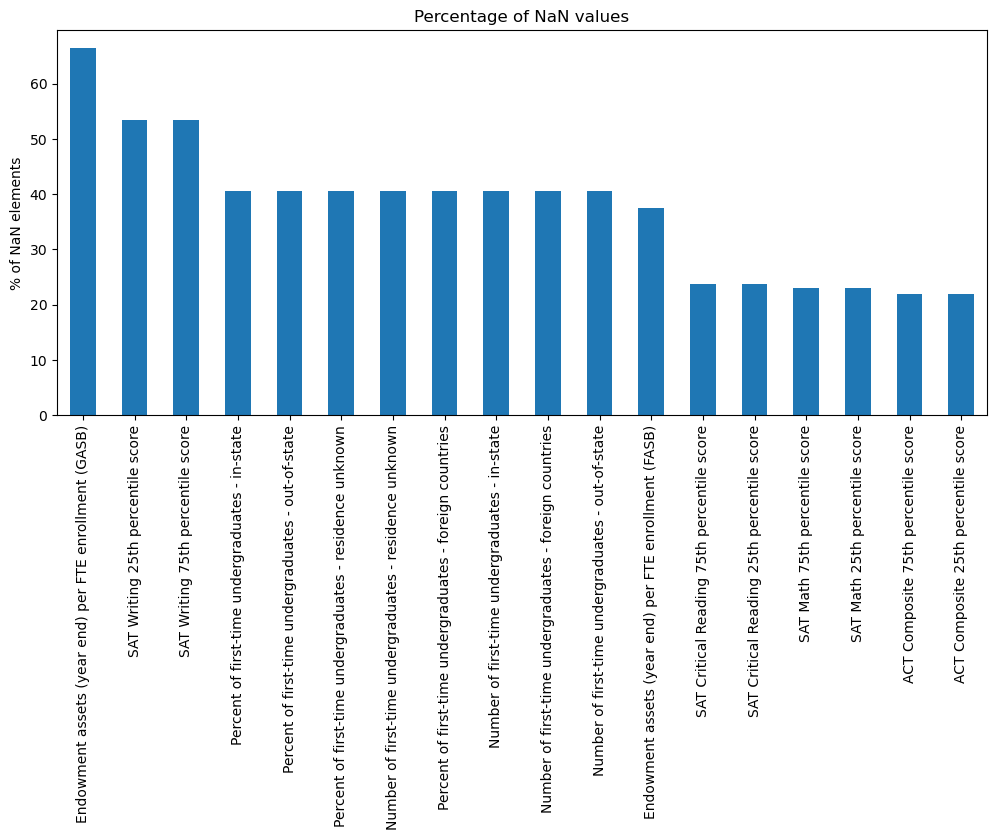

In [11]:
#the filtered and sorted percentages of NaN values.
ax = perc_nan[perc_nan > 20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values', figsize=(12, 5))
ax.set_ylabel('% of NaN elements')
plt.show();

In [13]:
#All columns >20% NaN values will be dropped
dropped = df_important.isna().sum()[df_important.isna().sum()>=(0.2*len(df_important))].index.values
#df.isna().sum()
df_important.drop(dropped, axis = 1, inplace = True)
df_important.shape

(1534, 127)

In [14]:
df_important.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 127 columns):
 #    Column                                                                                  Dtype  
---   ------                                                                                  -----  
 0    ID number                                                                               int64  
 1    Name                                                                                    object 
 2    year                                                                                    int64  
 3    ZIP code                                                                                object 
 4    Highest degree offered                                                                  object 
 5    County name                                                                             object 
 6    Longitude location of institution                                     

**the essential questions
for developing this project are related to the number of applications,
admissions, and enrollments, cost of tuition and fees, cost of living on
campus, types of degrees offered, and features of the states where universities
are located (population and GDP).**

In [15]:

df = df_important[["Name","Highest degree offered","Applicants total","Admissions total","Enrolled total","Percent admitted - total","Admissions yield - total",
               "Tuition and fees, 2013-14","Total price for in-state students living on campus 2013-14",
               "Total price for out-of-state students living on campus 2013-14","State abbreviation","Control of institution"]]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   Highest degree offered                                          1534 non-null   object 
 2   Applicants total                                                1377 non-null   float64
 3   Admissions total                                                1377 non-null   float64
 4   Enrolled total                                                  1377 non-null   float64
 5   Percent admitted - total                                        1376 non-null   float64
 6   Admissions yield - total                                        1376 non-null   float64
 7   Tuition and fees, 2013-14                          


1-**Applicants total**: number of students who applied for the iniversity.

2-**Admissions total**: number of students who were accepted to join the iniversity.

3-**Enrolled total**: number of students who finally joined the iniversity.

4-**Percent admitted - total**: % of students who was accepted from total appicants (admissions/applicants)

5-**Admissions yield - total**: % of students who actually joined from total admitted (Enrolled/admissions)

In [17]:
df.head()

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution
0,Alabama A & M University,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,90.0,20.0,7182.0,21849.0,27441.0,Alabama,Public
1,University of Alabama at Birmingham,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,87.0,36.0,7206.0,22495.0,31687.0,Alabama,Public
2,Amridge University,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,NaN,NaN,6870.0,NaN,NaN,Alabama,Private not-for-profit
3,University of Alabama in Huntsville,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,81.0,39.0,9192.0,23466.0,35780.0,Alabama,Public
4,Alabama State University,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,51.0,28.0,8720.0,18286.0,25222.0,Alabama,Public


In [18]:
df["acceptance rate"] = (df["Admissions total"]/df["Applicants total"] * 100).round(decimals=2)
df["enrollment rate"] = (df["Enrolled total"]/df["Admissions total"]  * 100).round(decimals=2)


C:\Users\user\AppData\Local\Temp\ipykernel_28864\2621275537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["acceptance rate"] = (df["Admissions total"]/df["Applicants total"] * 100).round(decimals=2)
C:\Users\user\AppData\Local\Temp\ipykernel_28864\2621275537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["enrollment rate"] = (df["Enrolled total"]/df["Admissions total"]  * 100).round(decimals=2)


In [19]:
df.drop(["Percent admitted - total","Admissions yield - total"], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_28864\1679821389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Percent admitted - total","Admissions yield - total"], axis=1, inplace=True)


In [20]:
df.describe()

,Applicants total,Admissions total,Enrolled total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,acceptance rate,enrollment rate
count,1377.000000,1377.000000,1377.000000,1497.000000,1400.000000,1400.000000,1376.000000,1376.000000
mean,6391.193174,3554.880174,1043.046478,20727.490314,34935.306429,38767.612857,64.570094,33.062471
std,8787.469171,4309.457606,1285.165519,12455.805360,13283.049319,10716.524007,18.709594,14.989950
min,0.000000,0.000000,0.000000,1032.000000,9768.000000,9768.000000,5.690000,5.890000
25%,1488.000000,950.000000,287.000000,8542.000000,22487.000000,31128.000000,53.902500,22.065000
50%,3350.000000,2056.000000,538.000000,20060.000000,34115.000000,37193.500000,66.580000,30.405000
75%,7016.000000,4203.000000,1246.000000,29992.000000,44835.750000,45907.500000,77.552500,40.422500
max,72676.000000,35815.000000,10241.000000,49138.000000,64988.000000,64988.000000,100.000000,100.000000


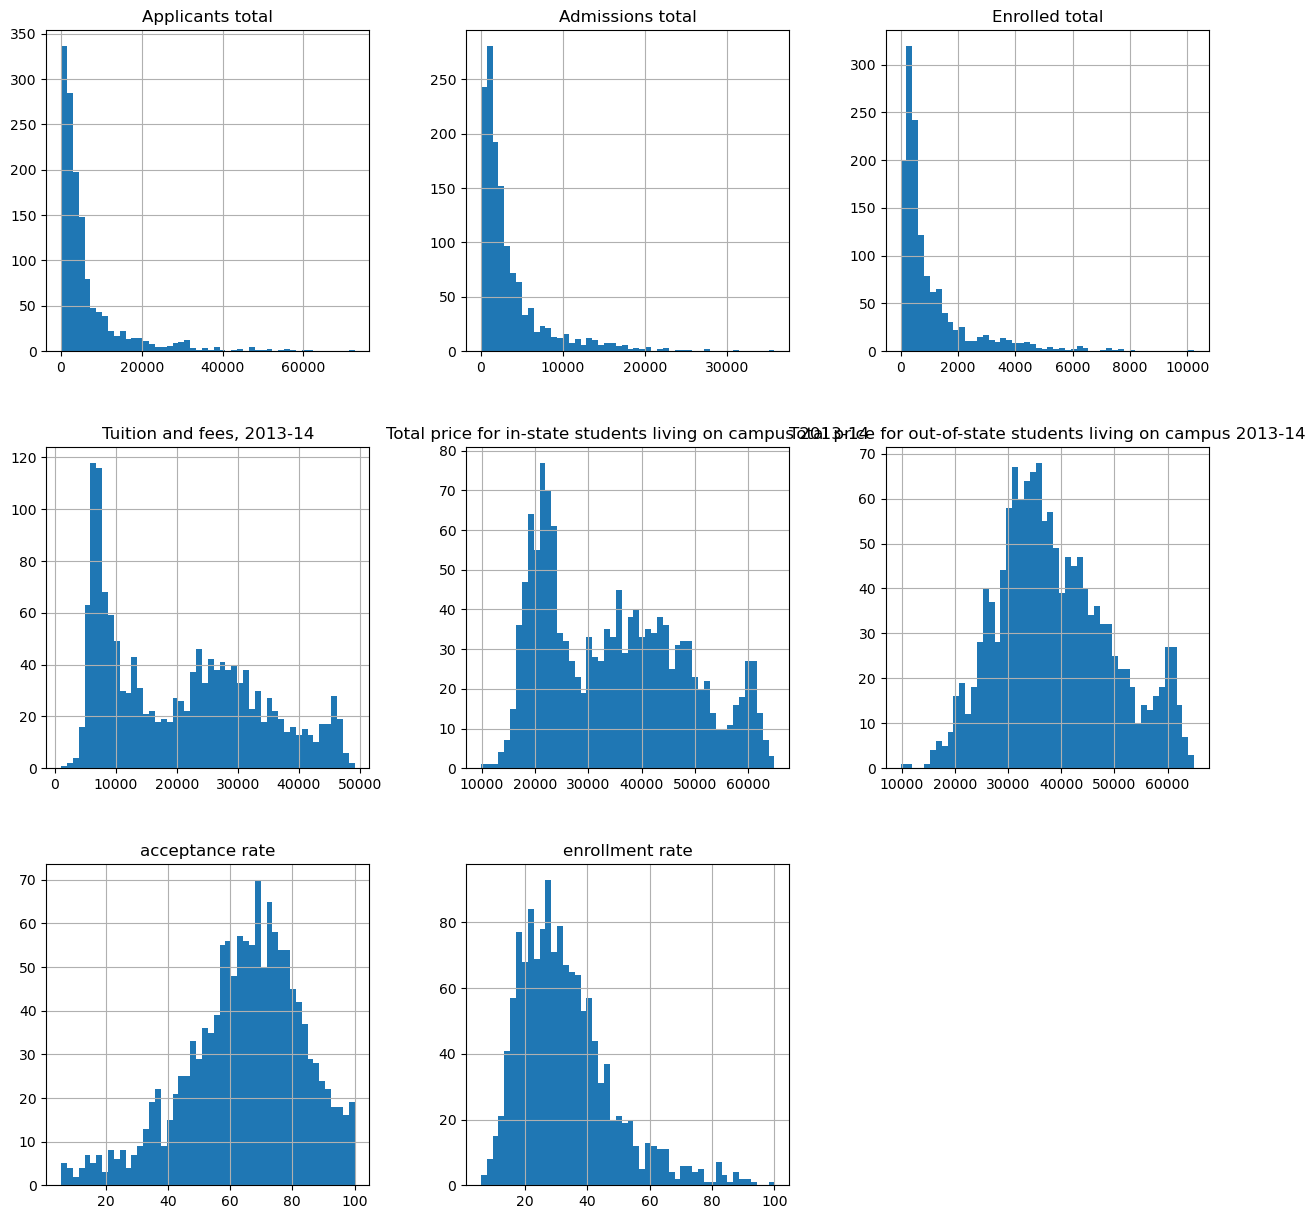

In [21]:
df.hist(figsize=(15,15),bins=50);

In [22]:
incomplete_df = df[df[["Applicants total","Admissions total","Enrolled total"]].isnull().all(axis=1)]

In [23]:
incomplete_df.head()

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,acceptance rate,enrollment rate
2,Amridge University,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,6870.0,NaN,NaN,Alabama,Private not-for-profit,NaN,NaN
6,Athens State University,Bachelor's degree,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,Public,NaN,NaN
10,Concordia College Alabama,Bachelor's degree,NaN,NaN,NaN,8090.0,18330.0,18330.0,Alabama,Private not-for-profit,NaN,NaN
11,Faulkner University,Doctor's degree - professional practice,NaN,NaN,NaN,18230.0,31010.0,31010.0,Alabama,Private not-for-profit,NaN,NaN
16,Miles College,Bachelor's degree,NaN,NaN,NaN,11454.0,22318.0,22318.0,Alabama,Private not-for-profit,NaN,NaN


In [24]:
df.dropna(subset=["Applicants total","Admissions total","Enrolled total"], how="all",axis=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_28864\2350514683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Applicants total","Admissions total","Enrolled total"], how="all",axis=0, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1377 entries, 0 to 1532
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1377 non-null   object 
 1   Highest degree offered                                          1377 non-null   object 
 2   Applicants total                                                1377 non-null   float64
 3   Admissions total                                                1377 non-null   float64
 4   Enrolled total                                                  1377 non-null   float64
 5   Tuition and fees, 2013-14                                       1377 non-null   float64
 6   Total price for in-state students living on campus 2013-14      1326 non-null   float64
 7   Total price for out-of-state students living on campus 2

In [26]:
df[df[["enrollment rate"]].isnull().all(axis=1)]

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,acceptance rate,enrollment rate
99,Golden Gate University-San Francisco,Doctor's degree - research/scholarship and pro...,0.0,0.0,0.0,14400.0,NaN,NaN,California,Private not-for-profit,NaN,NaN


In [27]:
df.dropna(subset=["enrollment rate"], how="all",axis=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_28864\1278579989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["enrollment rate"], how="all",axis=0, inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 0 to 1532
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1376 non-null   object 
 1   Highest degree offered                                          1376 non-null   object 
 2   Applicants total                                                1376 non-null   float64
 3   Admissions total                                                1376 non-null   float64
 4   Enrolled total                                                  1376 non-null   float64
 5   Tuition and fees, 2013-14                                       1376 non-null   float64
 6   Total price for in-state students living on campus 2013-14      1326 non-null   float64
 7   Total price for out-of-state students living on campus 2

**Q1**


Do universities with a high number of applications are the preferred ones by students?

in other words, could the number of applications tell us that a university is one of the most preferred by students?

correlation between no. of applicants and enrollment rate = -0.11129544677082022


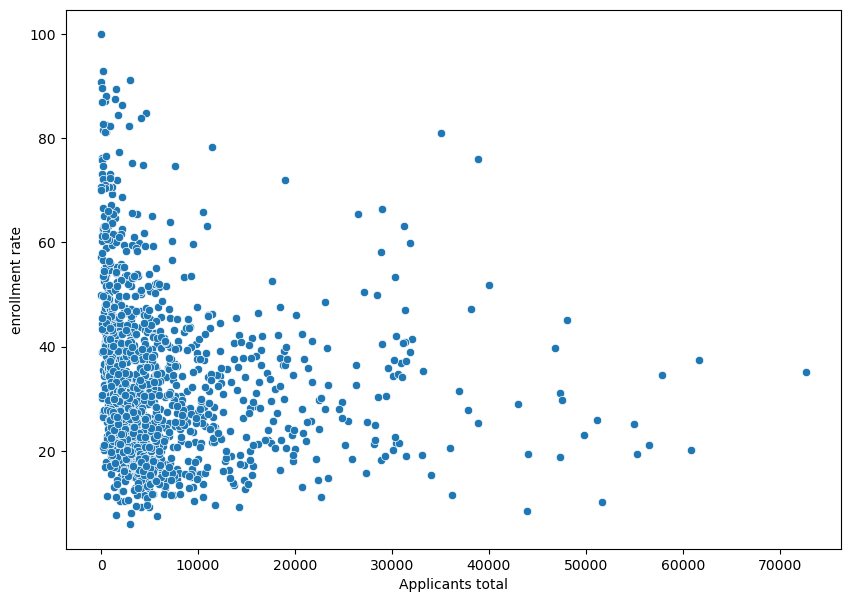

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['Applicants total'], y=df['enrollment rate'])
print(f"correlation between no. of applicants and enrollment rate = {df['Applicants total'].corr(df['enrollment rate'])}")

**Q1 results**

We can see that there is a very weak correlation between number of applicants and enrollment rate which is the strongest indicator about preferance of students in universities, which means Students don't prefer universities with a high number of applications.

**Do students prefer universities that have a high rate of admission?in other words, do students prefer a university where it is easier for them to be admitted?**

correlation between no. of applicants and acceptance rate = -0.3483032411488473

correlation between enrollment rate and acceptance rate = -0.07165986641549474



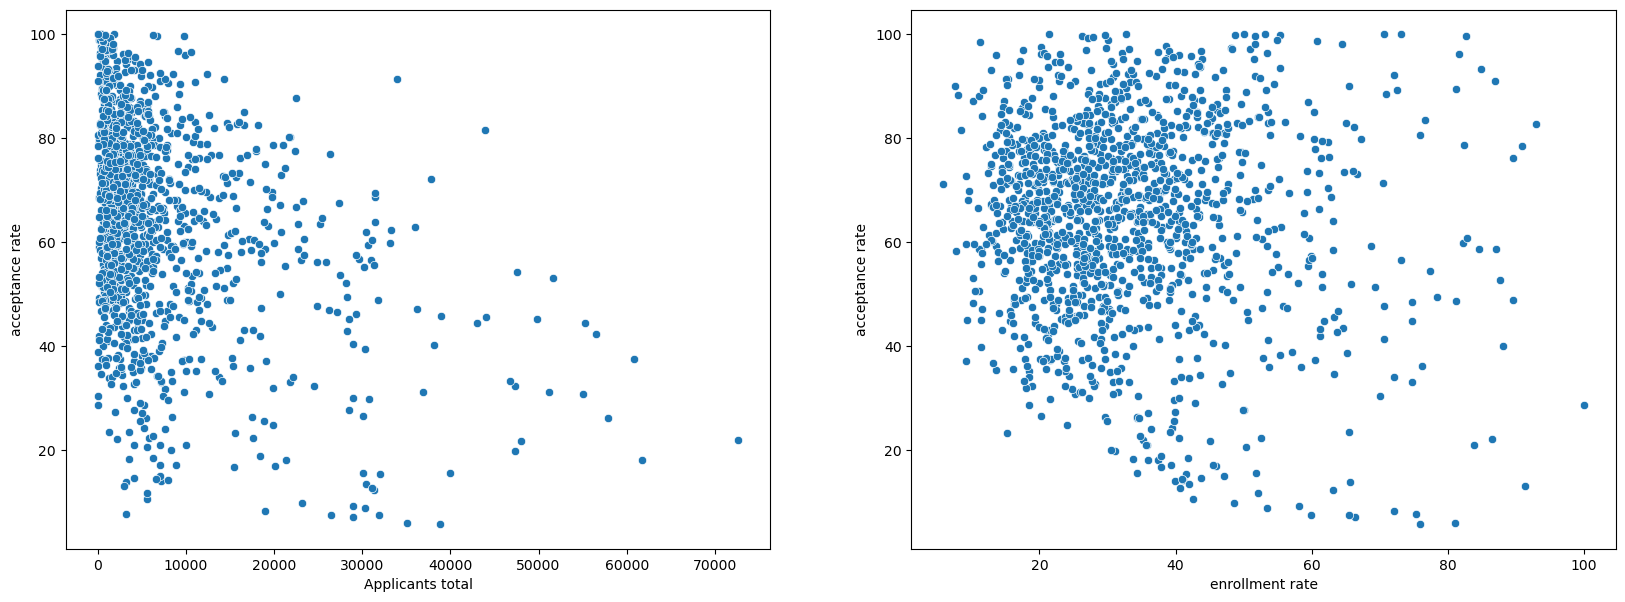

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants total'], y=df['acceptance rate'], ax= axes[0])
sns.scatterplot(x= df['enrollment rate'], y=df['acceptance rate'], ax= axes[1])

print(f"correlation between no. of applicants and acceptance rate = {df['Applicants total'].corr(df['acceptance rate'])}\n")
print(f"correlation between enrollment rate and acceptance rate = {df['enrollment rate'].corr(df['acceptance rate'])}\n")

**Q2 results**


It's obvious that number of applicants is negative correlatation with acceptance rate as universitites with high number of applicants tends to accept less percentage of student's .

On the other hand there is no correlation between acceptance rate and enrollment rate. in other words, students don't prefer a university where it is easier for them to be admitted.

**Q3**


Do students prefer public or private universities?

Text(0, 0.5, 'Average of enrollment rate')

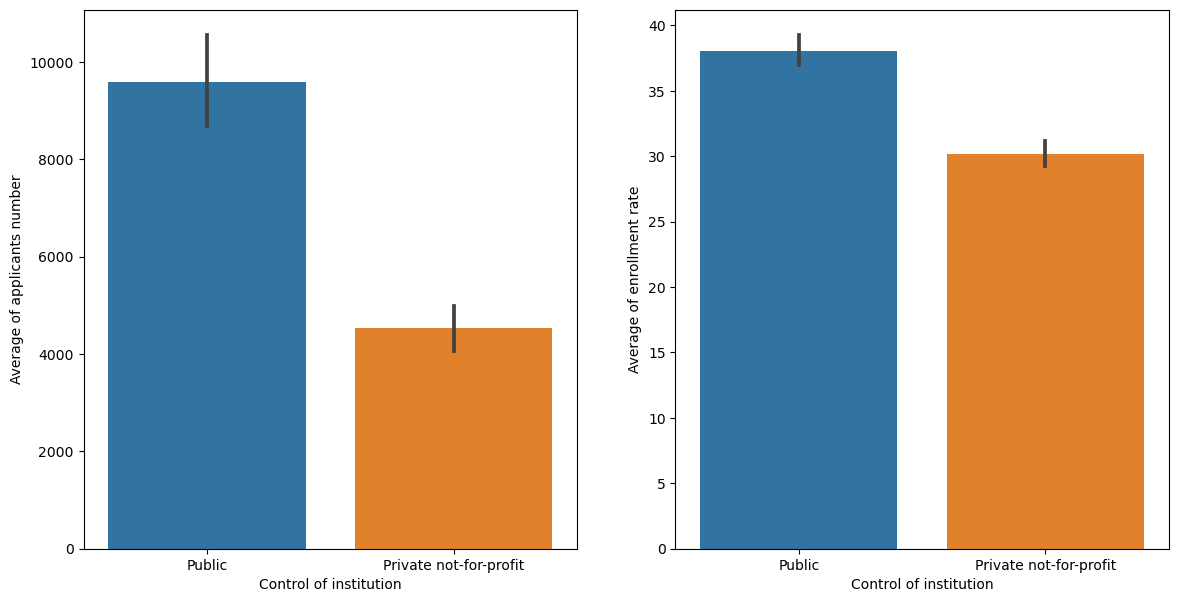

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

sns.barplot(x= df['Control of institution'], y=df['Applicants total'], ax= axes[0])
axes[0].set_ylabel("Average of applicants number")

sns.barplot(x= df['Control of institution'], y=df['enrollment rate'], ax= axes[1])
axes[1].set_ylabel("Average of enrollment rate")

In [32]:
df.groupby(['Control of institution'])[['Applicants total','enrollment rate']].mean()

,Applicants total,enrollment rate
Control of institution,,
Private not-for-profit,4530.266129,30.135207
Public,9583.468504,38.064173


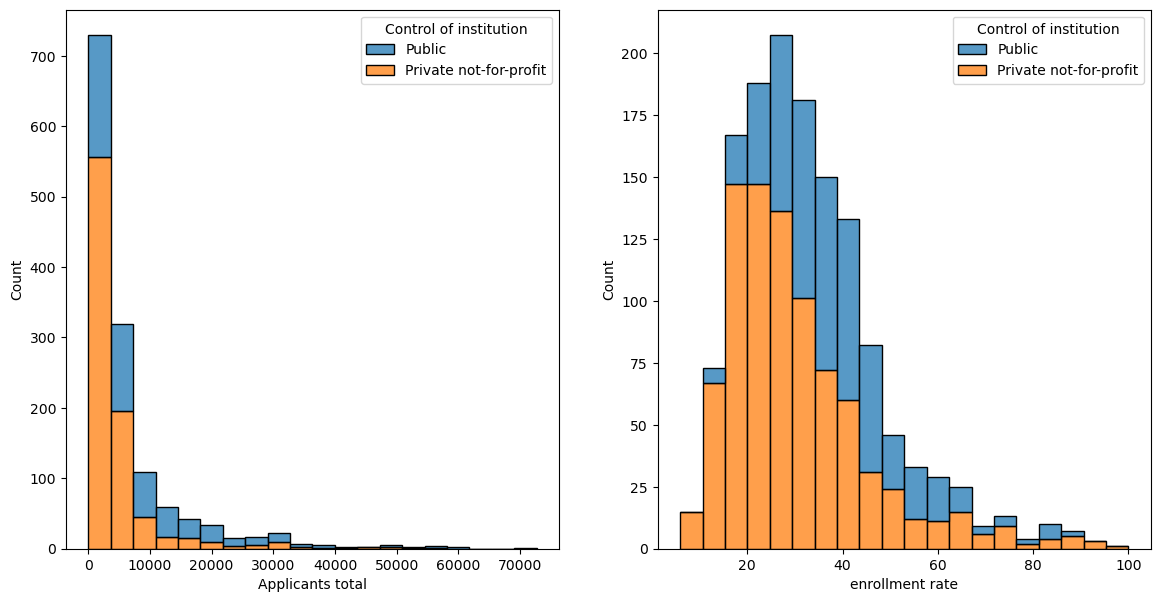

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(x=df['Applicants total'],hue = df['Control of institution'], ax= axes[0], bins = 20, multiple="stack")
sns.histplot(x= df['enrollment rate'],hue = df['Control of institution'], ax= axes[1], bins = 20, multiple="stack");

**Q3 results**


We can see that public universities gets much higher number of applicants (more than double on average) and higher enrollment rate (by about 8% higher on average). This means that students prefer public universities over private ones

**Q4**
Do students prefer universities with low tuition and fees?

correlation between no. of applicants and tuition and fees = -0.03137488206219164

correlation between enrollment rate and tuition and fees = -0.35703787667200365



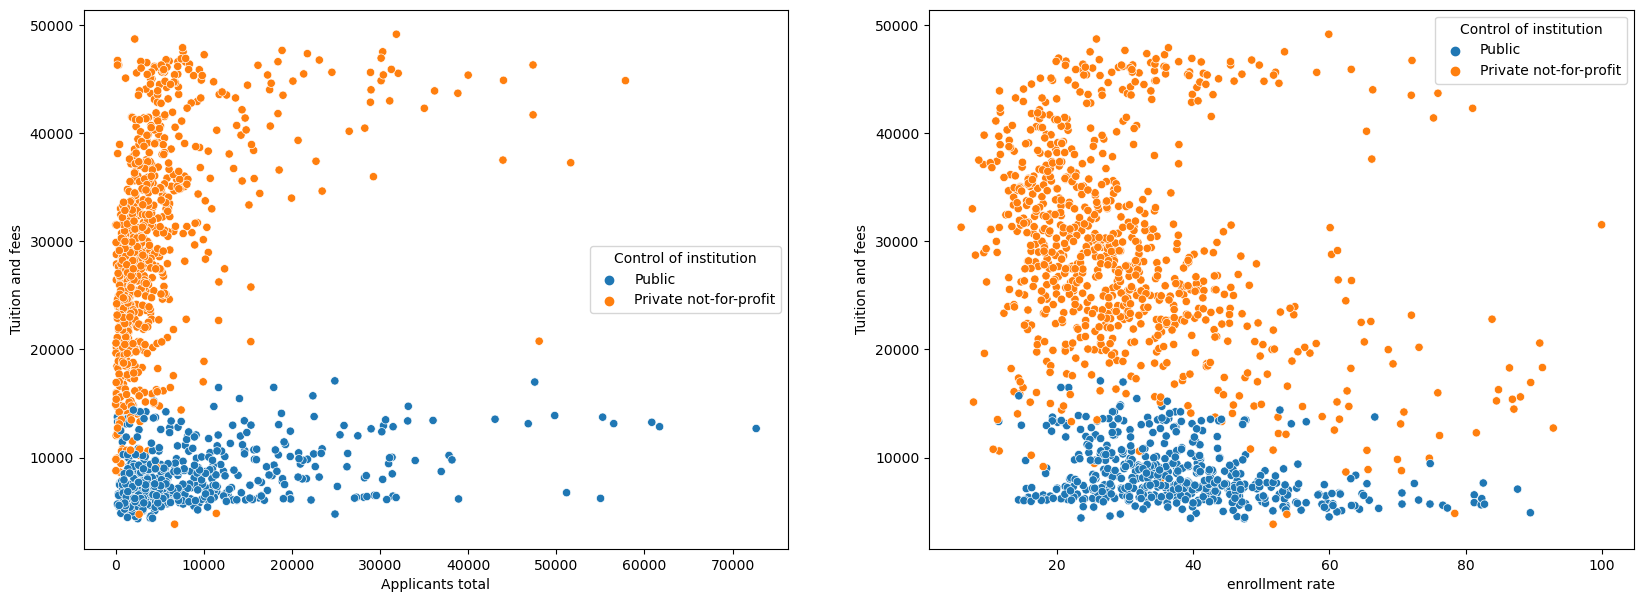

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants total'], y=df['Tuition and fees, 2013-14'], ax= axes[0], hue= df['Control of institution'])
axes[0].set_ylabel("Tuition and fees")

sns.scatterplot(x= df['enrollment rate'], y=df['Tuition and fees, 2013-14'], ax= axes[1], hue= df['Control of institution'])
axes[1].set_ylabel("Tuition and fees")

print(f"correlation between no. of applicants and tuition and fees = {df['Applicants total'].corr(df['Tuition and fees, 2013-14'])}\n")
print(f"correlation between enrollment rate and tuition and fees = {df['enrollment rate'].corr(df['Tuition and fees, 2013-14'])}\n");

Text(0, 0.5, 'Average of Tuition and fees')

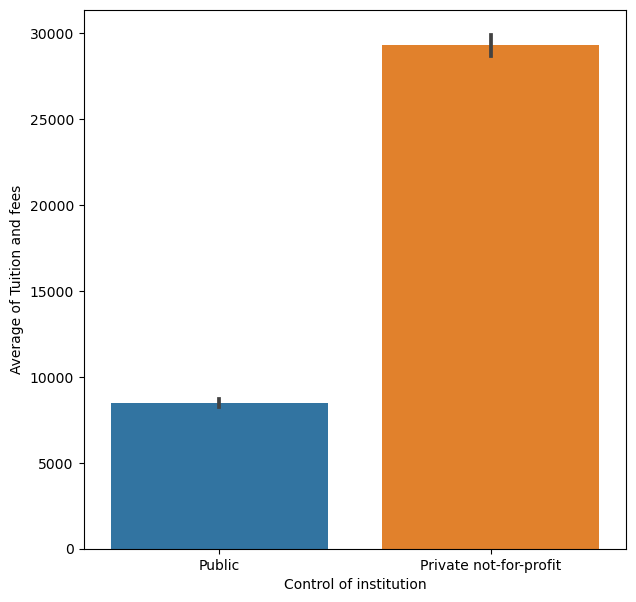

In [37]:
plt.figure(figsize=(7,7))
sns.barplot(x= df['Control of institution'], y=df['Tuition and fees, 2013-14'])
plt.ylabel("Average of Tuition and fees")

**Q4 results**


We can see that puplic universities have less tuition and fees than private ones. This brings the fact we discovered in the last question that pubic universities are more prefered than private ones. Also there is a more applicants and enrollment rate when it comes to universities with lower tuition and fees. on the other hand some of very high tuition and fees universities have high applicants and enrollment rate, maybe beacuse they are special or high class ones. But we can say that generally students prefer universities with low tuition and fees

**Q5**

Do students prefer a university for its low on-campus cost of living?

correlation between no. of applicants and price for in-state students living  = 0.023719637300424215

correlation between enrollment rate and price for in-state students living = -0.37446987575873697



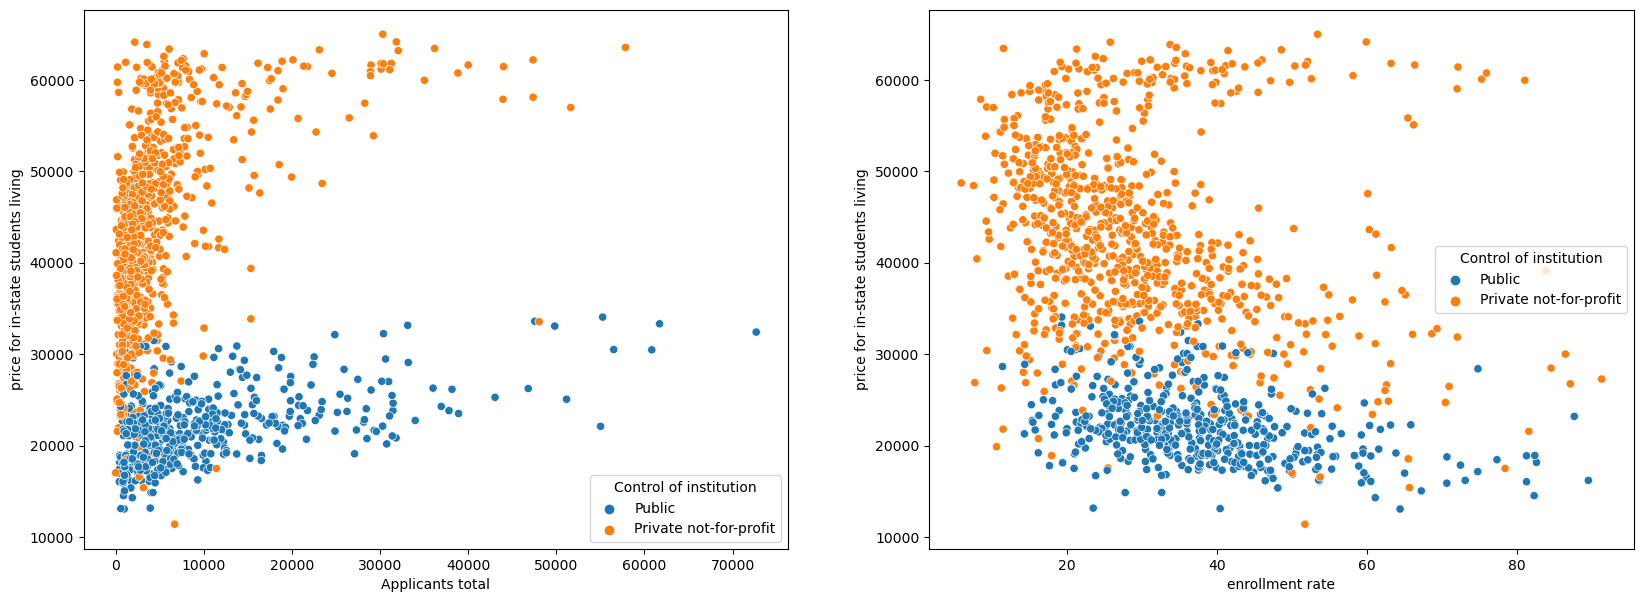

In [39]:
 fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants total'], y=df['Total price for in-state students living on campus 2013-14'], ax= axes[0], hue= df['Control of institution'])
axes[0].set_ylabel("price for in-state students living")

sns.scatterplot(x= df['enrollment rate'], y=df['Total price for in-state students living on campus 2013-14'], ax= axes[1], hue= df['Control of institution'])
axes[1].set_ylabel("price for in-state students living")

print(f"correlation between no. of applicants and price for in-state students living  = {df['Applicants total'].corr(df['Total price for in-state students living on campus 2013-14'])}\n")
print(f"correlation between enrollment rate and price for in-state students living = {df['enrollment rate'].corr(df['Total price for in-state students living on campus 2013-14'])}\n")

correlation between no. of applicants and price for out-of-state students living  = 0.27545906792735186

correlation between enrollment rate and price for out-of-state students living = -0.36126018174775615



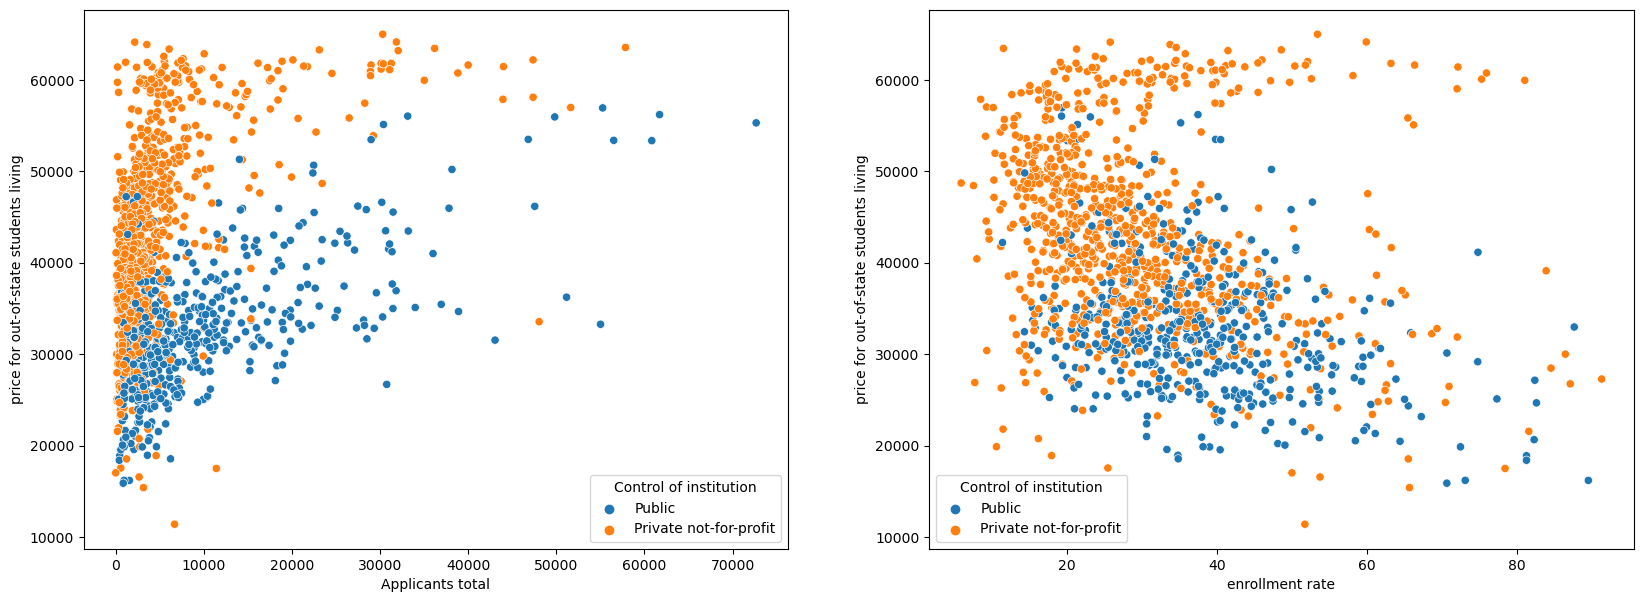

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(x= df['Applicants total'], y=df['Total price for out-of-state students living on campus 2013-14'], ax= axes[0], hue= df['Control of institution'])
axes[0].set_ylabel("price for out-of-state students living")

sns.scatterplot(x= df['enrollment rate'], y=df['Total price for out-of-state students living on campus 2013-14'], ax= axes[1], hue= df['Control of institution'])
axes[1].set_ylabel("price for out-of-state students living")

print(f"correlation between no. of applicants and price for out-of-state students living  = {df['Applicants total'].corr(df['Total price for out-of-state students living on campus 2013-14'])}\n")
print(f"correlation between enrollment rate and price for out-of-state students living = {df['enrollment rate'].corr(df['Total price for out-of-state students living on campus 2013-14'])}\n")

Text(0, 0.5, 'Average of price for out-of-state students living')

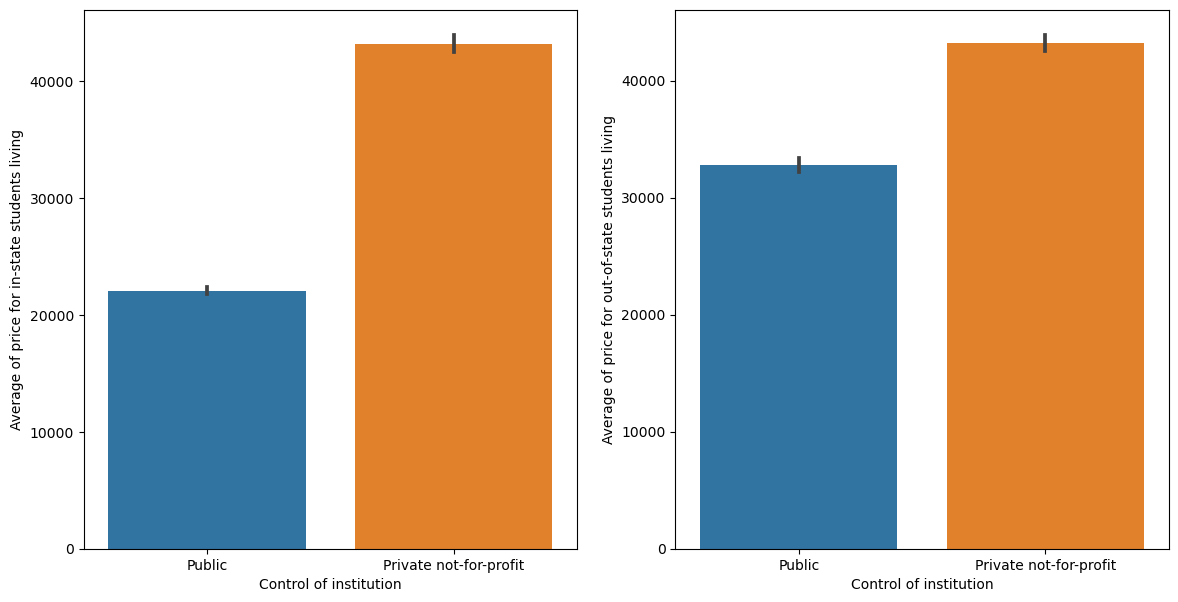

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

sns.barplot(x= df['Control of institution'], y=df['Total price for in-state students living on campus 2013-14'], ax= axes[0])
axes[0].set_ylabel("Average of price for in-state students living")

sns.barplot(x= df['Control of institution'], y=df['Total price for out-of-state students living on campus 2013-14'], ax= axes[1])
axes[1].set_ylabel("Average of price for out-of-state students living")

In [42]:
df.groupby(['Control of institution'])[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']].mean()

,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
Control of institution,,
Private not-for-profit,43191.330588,43191.330588
Public,22065.384454,32789.716387


**Q5 results**

We notice that it's almost the same relation for cost of living as for tuition and fees. Students prefer universities with low cost of living both inside and outside of state students. Also it's related to if it's a public or private university as public ones have lower price of living.

The correlation value between the number of applicants and price of living is misleading as there is some high preferance of very high price of living universities.

Also we can see that private universities don't differentiate between in-state or out-state students, they all have the same price of living. On the contrary, puplic universities have lower price for in-state students and higher by about 50% for out-

**Q6**

Do students prefer universities from highly populated states?

We donot have population data of usa by state to  compare it with total applicants and enrollment rate



Do students prefer a university because it belongs to a state with a high GDP per capita?